In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap


In [4]:
# Load the Excel file
df_tot = pd.read_excel("InvestmentReplica.xlsx", sheet_name="Replica")
# We create a target of our portfolio replica as a weighted combination of HFRXGL, MXWO and LEGATRUU
monster = np.diff(np.log(df_tot['MXWO']))*0.80+np.diff(np.log(df_tot['LEGATRUU']))*0.15+np.diff(np.log(df_tot['HFRXGL']))*0.05

df_nodata= df_tot.drop('Date', axis=1)

# Drop the indices and insert the column 'MonsterIndex' in df
df = df_nodata.drop(['MXWD', 'MXWO','LEGATRUU', 'HFRXGL'], axis=1) 
def norm_col(col):
    return np.diff(np.log(col))

df = df.apply(norm_col)
df_nodata = df.apply(norm_col)
df['MonsterIndex'] = monster

print(df.head())

        RX1       TY1       GC1       CO1       ES1       VG1       NQ1  \
0  0.000791  0.001272  0.037242  0.053921  0.006859  0.018717  0.002596   
1  0.000000  0.001975  0.044198  0.064438 -0.007187 -0.011460  0.007077   
2  0.004909  0.007581 -0.030081 -0.048667 -0.027759 -0.023321 -0.077593   
3  0.003230  0.012785 -0.009557  0.072297 -0.025435 -0.006265 -0.015236   
4  0.003133  0.007018  0.028157 -0.031597 -0.013577 -0.012885 -0.001475   

       LLL1       TP1       DU1       TU2  MonsterIndex  
0  0.028268  0.025151  0.000242  0.000903      0.016247  
1 -0.002950 -0.021972  0.000000  0.002255     -0.005107  
2 -0.037828 -0.089582  0.001787  0.002475     -0.023681  
3 -0.036700  0.021971  0.001977  0.006123     -0.015185  
4 -0.023954  0.008453  0.001204  0.001488     -0.003917  


/Users/gaiai/Desktop/Fintech/BC4/venv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gaiai/Desktop/Fintech/BC4/venv/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/gaiai/Desktop/Fintech/BC4/venv/lib/python3.7/site-packages/numpy/lib/function_base.py:1292: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


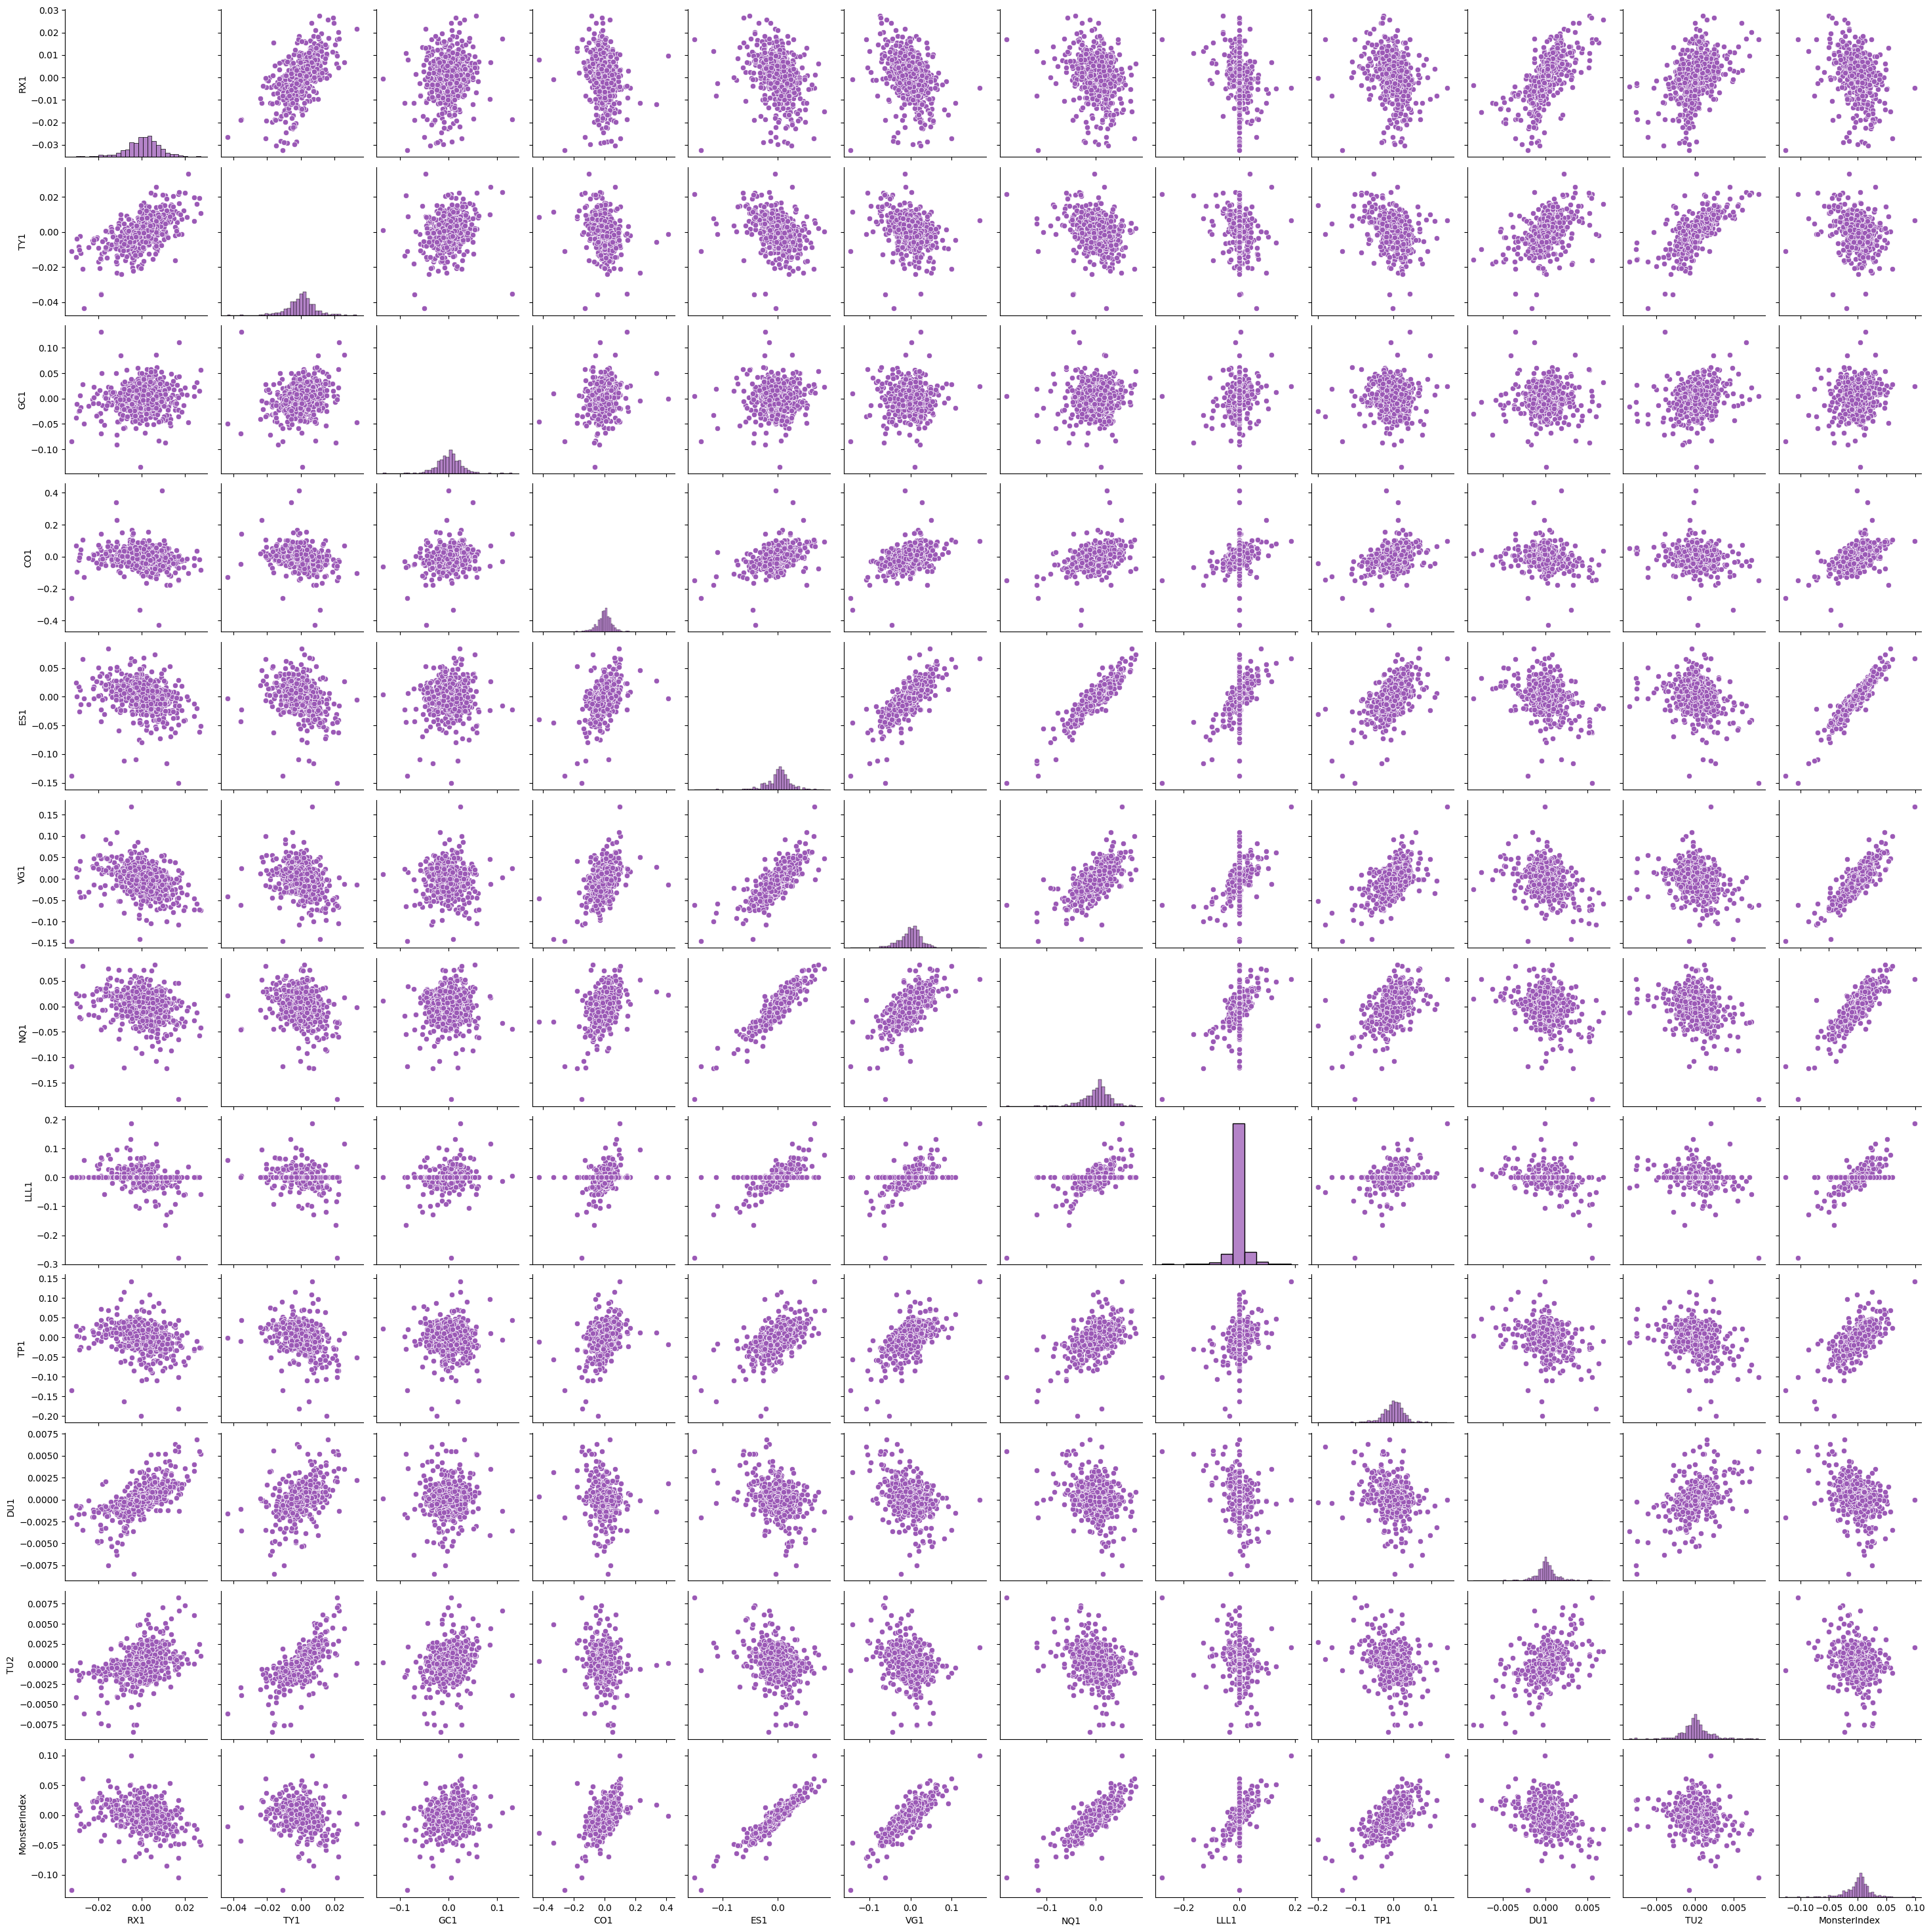

<Figure size 700x400 with 0 Axes>

In [5]:
# Scatter plots between variables
color = ['#9b59b6'] 
sns.set_palette(sns.color_palette(color))
sns.pairplot(df, kind="scatter")
plt.figure(figsize=(7, 4)) 
plt.show()

In [6]:
#Dataset with indices (df_4):
dates = df_tot['Date']
cols_to_drop = ['RX1', 'TY1', 'GC1', 'CO1', 'ES1', 'VG1', 'NQ1', 'LLL1', 'TP1', 'DU1', 'TU2', 'Date']
df_4 = df_tot.drop(columns=cols_to_drop)
print('df_tot summary:', df_tot.head(), '\n')

df_4['Date'] = dates
df['Date'] = dates
df_4.set_index('Date', inplace=True)
print('df_4 summary:', df_4.head(), '\n')

#Dataset with only futures (df_11):
cols_to_drop2 = ['MXWO','MXWD','LEGATRUU','HFRXGL']
df_11 = df_tot.drop(columns=cols_to_drop2)
df_11.set_index('Date', inplace=True)
print('df_11 summary:', df_11.head())

df.set_index('Date', inplace=True)

df_tot summary:         Date     MXWO    MXWD  LEGATRUU   HFRXGL     RX1         TY1    GC1  \
0 2007-10-23  1633.44  414.14  350.2138  1343.63  113.70  110.515625  759.0   
1 2007-10-30  1663.89  423.26  352.5413  1356.53  113.79  110.656250  787.8   
2 2007-11-06  1651.59  419.51  354.1758  1360.20  113.79  110.875000  823.4   
3 2007-11-13  1601.81  405.98  357.2217  1347.16  114.35  111.718750  799.0   
4 2007-11-20  1570.74  398.54  359.4446  1335.21  114.72  113.156250  791.4   

     CO1      ES1     VG1      NQ1    LLL1     TP1      DU1         TU2  
0  82.85  1525.50  4393.0  2212.00  1287.0  1570.5  103.385  103.718750  
1  87.44  1536.00  4476.0  2217.75  1323.9  1610.5  103.410  103.812500  
2  93.26  1525.00  4425.0  2233.50  1320.0  1575.5  103.410  104.046875  
3  88.83  1483.25  4323.0  2066.75  1271.0  1440.5  103.595  104.304688  
4  95.49  1446.00  4296.0  2035.50  1225.2  1472.5  103.800  104.945312   

df_4 summary:                MXWO    MXWD  LEGATRUU   HFRXGL
Da

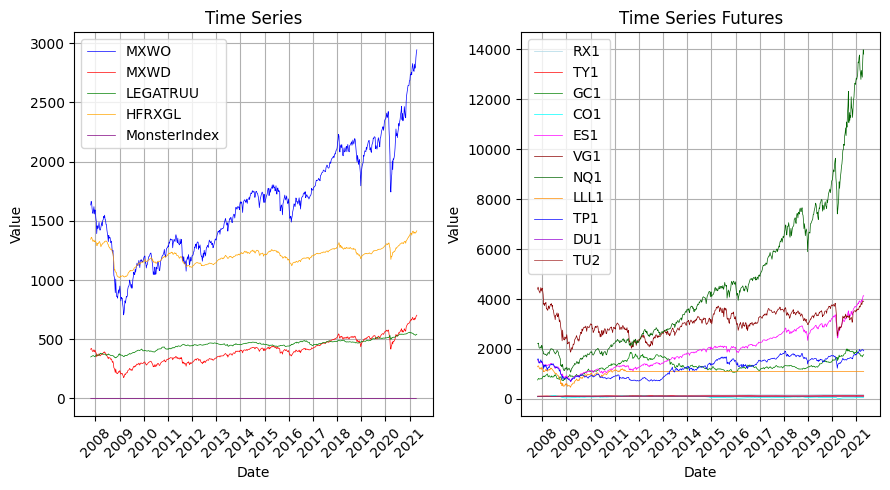

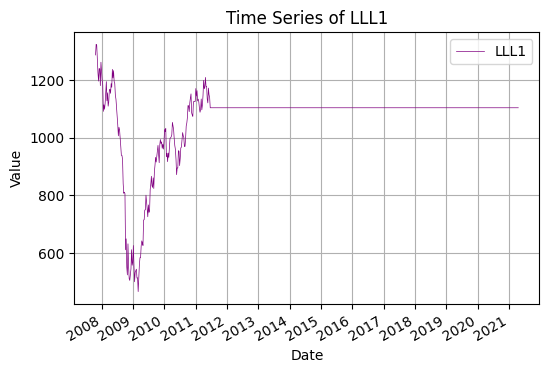

Constant value of LLL1 from 21/06/2011 is:  1103.6


In [7]:
#Time Series with no- standardized data

# Plotting the time series of the indices
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.plot(df_4.index, df_4['MXWO'], color='blue', linestyle='-', linewidth = 0.5, label='MXWO')
ax1.plot(df_4.index, df_4['MXWD'], color='red', linestyle='-', linewidth = 0.5, label='MXWD')
ax1.plot(df_4.index, df_4['LEGATRUU'], color='green', linestyle='-', linewidth = 0.5, label='LEGATRUU')
ax1.plot(df_4.index, df_4['HFRXGL'], color='orange', linestyle='-', linewidth = 0.5, label='HFRXGL')
ax1.plot(df.index, df['MonsterIndex'], color='purple', linestyle='-', linewidth = 0.5, label='MonsterIndex')
ax1.set_title('Time Series')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid()
ax1.legend()
ax1.xaxis.set_major_locator(mdates.YearLocator())  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=45)

# Plotting the time series of futures
ax2.plot(df_11.index, df_11['RX1'], color='lightblue', linestyle='-', linewidth = 0.5, label='RX1')
ax2.plot(df_11.index, df_11['TY1'], color='red', linestyle='-', linewidth = 0.5, label='TY1')
ax2.plot(df_11.index, df_11['GC1'], color='green', linestyle='-', linewidth = 0.5, label='GC1')
ax2.plot(df_11.index, df_11['CO1'], color='cyan', linestyle='-', linewidth = 0.5, label='CO1')
ax2.plot(df_11.index, df_11['ES1'], color='magenta', linestyle='-', linewidth = 0.5, label='ES1')
ax2.plot(df_11.index, df_11['VG1'], color='darkred', linestyle='-', linewidth = 0.5, label='VG1')
ax2.plot(df_11.index, df_11['NQ1'], color='darkgreen', linestyle='-', linewidth = 0.5, label='NQ1')
ax2.plot(df_11.index, df_11['LLL1'], color='darkorange', linestyle='-', linewidth = 0.5, label='LLL1')
ax2.plot(df_11.index, df_11['TP1'], color='blue', linestyle='-', linewidth = 0.5, label='TP1')
ax2.plot(df_11.index, df_11['DU1'], color='darkviolet', linestyle='-', linewidth = 0.5, label='DU1')
ax2.plot(df_11.index, df_11['TU2'], color='brown', linestyle='-', linewidth = 0.5, label='TU2')
ax2.set_title('Time Series Futures')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.grid(True)
ax2.legend()
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_11.index, df_11['LLL1'], color = 'purple', linestyle='-', linewidth = 0.5, label='LLL1')
plt.title('Time Series of LLL1')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.show()

#we print the value of LLL1 when it becomes constant ()
df_tot['Date'] = pd.to_datetime(df_tot['Date'])
date = df_tot['Date'].tolist()
for i in range(len(date)):
    if date[i] == pd.Timestamp('2011-06-21'):
        print('Constant value of LLL1 from 21/06/2011 is: ', df_tot['LLL1'].iloc[i])

We also plotted the time series of LLL1 futures contract to better understand our previous intuition about its behaviour: its price has been stagnant to 1103.6 dollars since 21 June 2011 (as printed in the last part of the code above).
While we presume that trading for this contract has been halted, we have been unable to verify this information through our investigations. Due to the possibility of data corruption, we have made the decision to cease using this financial instrument (instead here, in data exploration, we included it to have a complete analysis)

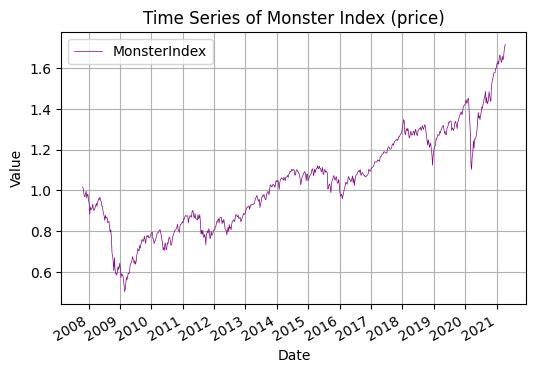

In [8]:
#  Inverse function (ret2price)
def ret2price(monster):
    monster = np.insert(monster, 0, 0)
    log_index = np.cumsum(monster)
    index = np.exp(log_index)
    return index

# Compute index from monster
index = ret2price(monster)


index = index[1:]

#Time Series of Monster Index's price
plt.figure(figsize=(6,4))
plt.plot(df.index, index, color = 'purple', linestyle='-', linewidth = 0.5, label='MonsterIndex')
plt.title('Time Series of Monster Index (price)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.show()

In [9]:
#standardize data
df_4_std = df_4.apply(norm_col)
print('df_4_std summary: ', df_4_std.head(), '\n')
df_11_std = df_11.apply(norm_col)
print('df_11_std summary: ', df_11_std.head())

df_4_std summary:         MXWO      MXWD  LEGATRUU    HFRXGL
0  0.018470  0.021783  0.006624  0.009555
1 -0.007420 -0.008899  0.004626  0.002702
2 -0.030604 -0.032783  0.008563 -0.009633
3 -0.019587 -0.018496  0.006203 -0.008910
4 -0.005625 -0.008644  0.006435 -0.007653 

df_11_std summary:          RX1       TY1       GC1       CO1       ES1       VG1       NQ1  \
0  0.000791  0.001272  0.037242  0.053921  0.006859  0.018717  0.002596   
1  0.000000  0.001975  0.044198  0.064438 -0.007187 -0.011460  0.007077   
2  0.004909  0.007581 -0.030081 -0.048667 -0.027759 -0.023321 -0.077593   
3  0.003230  0.012785 -0.009557  0.072297 -0.025435 -0.006265 -0.015236   
4  0.003133  0.007018  0.028157 -0.031597 -0.013577 -0.012885 -0.001475   

       LLL1       TP1       DU1       TU2  
0  0.028268  0.025151  0.000242  0.000903  
1 -0.002950 -0.021972  0.000000  0.002255  
2 -0.037828 -0.089582  0.001787  0.002475  
3 -0.036700  0.021971  0.001977  0.006123  
4 -0.023954  0.008453  0.001204  0.0

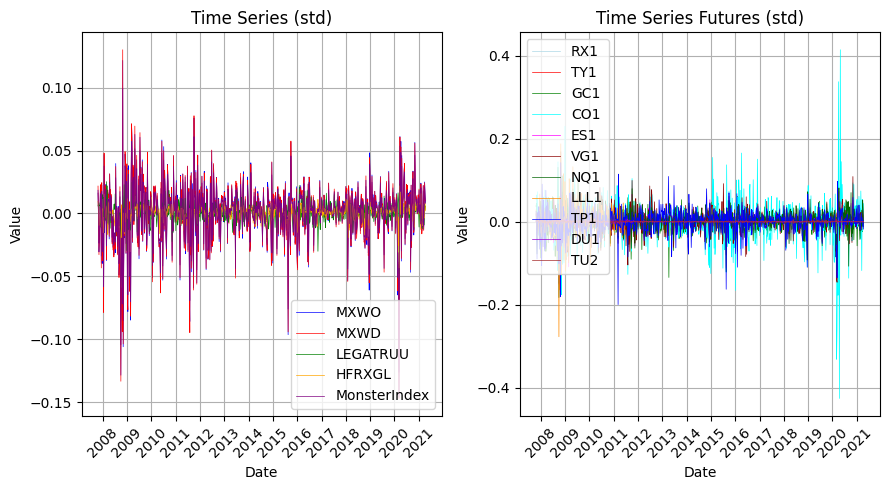

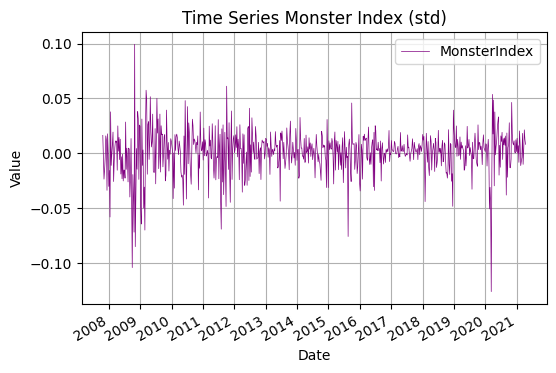

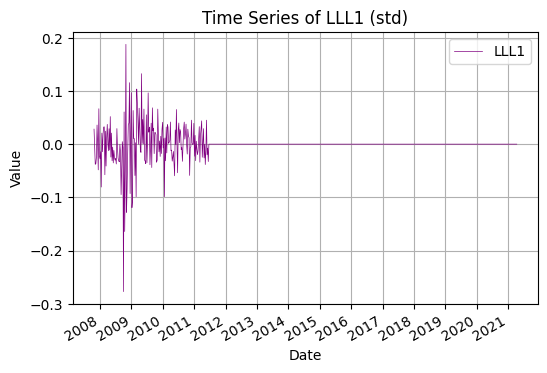

In [10]:
#Time Series with standardized data

# Plotting the time series of the indices
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.plot(df.index, df_4_std['MXWO'], color='blue', linestyle='-', linewidth = 0.5, label='MXWO')
ax1.plot(df.index, df_4_std['MXWD'], color='red', linestyle='-', linewidth = 0.5, label='MXWD')
ax1.plot(df.index, df_4_std['LEGATRUU'], color='green', linestyle='-', linewidth = 0.5, label='LEGATRUU')
ax1.plot(df.index, df_4_std['HFRXGL'], color='orange', linestyle='-', linewidth = 0.5, label='HFRXGL')
ax1.plot(df.index, df['MonsterIndex'], color='purple', linestyle='-', linewidth = 0.5, label='MonsterIndex')
ax1.set_title('Time Series (std)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Value')
ax1.grid()
ax1.legend()
ax1.xaxis.set_major_locator(mdates.YearLocator())  
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.tick_params(axis='x', rotation=45)


# Plotting the time series of futures
ax2.plot(df.index, df_11_std['RX1'], color='lightblue', linestyle='-',linewidth = 0.5,label='RX1')
ax2.plot(df.index, df_11_std['TY1'], color='red', linestyle='-', linewidth = 0.5,label='TY1')
ax2.plot(df.index, df_11_std['GC1'], color='green', linestyle='-', linewidth = 0.5,label='GC1')
ax2.plot(df.index, df_11_std['CO1'], color='cyan', linestyle='-', linewidth = 0.5,label='CO1')
ax2.plot(df.index, df_11_std['ES1'], color='magenta', linestyle='-', linewidth = 0.5,label='ES1')
ax2.plot(df.index, df_11_std['VG1'], color='darkred', linestyle='-', linewidth = 0.5,label='VG1')
ax2.plot(df.index, df_11_std['NQ1'], color='darkgreen', linestyle='-', linewidth = 0.5,label='NQ1')
ax2.plot(df.index, df_11_std['LLL1'], color='darkorange', linestyle='-', linewidth = 0.5,label='LLL1')
ax2.plot(df.index, df_11_std['TP1'], color='blue', linestyle='-', linewidth = 0.5,label='TP1')
ax2.plot(df.index, df_11_std['DU1'], color='darkviolet', linestyle='-', linewidth = 0.5,label='DU1')
ax2.plot(df.index, df_11_std['TU2'], color='brown', linestyle='-', linewidth = 0.5,label='TU2')
ax2.set_title('Time Series Futures (std)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.grid(True)
ax2.legend()
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#Plotting the Time series of the Monster Index only
plt.figure(figsize=(6, 4)) 
plt.plot(df.index, df['MonsterIndex'], color='purple', linestyle='-', linewidth = 0.5, label='MonsterIndex')
plt.title('Time Series Monster Index (std)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df.index, df_11_std['LLL1'], color='purple', linestyle='-', linewidth = 0.5, label='LLL1')
plt.title('Time Series of LLL1 (std)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.show()

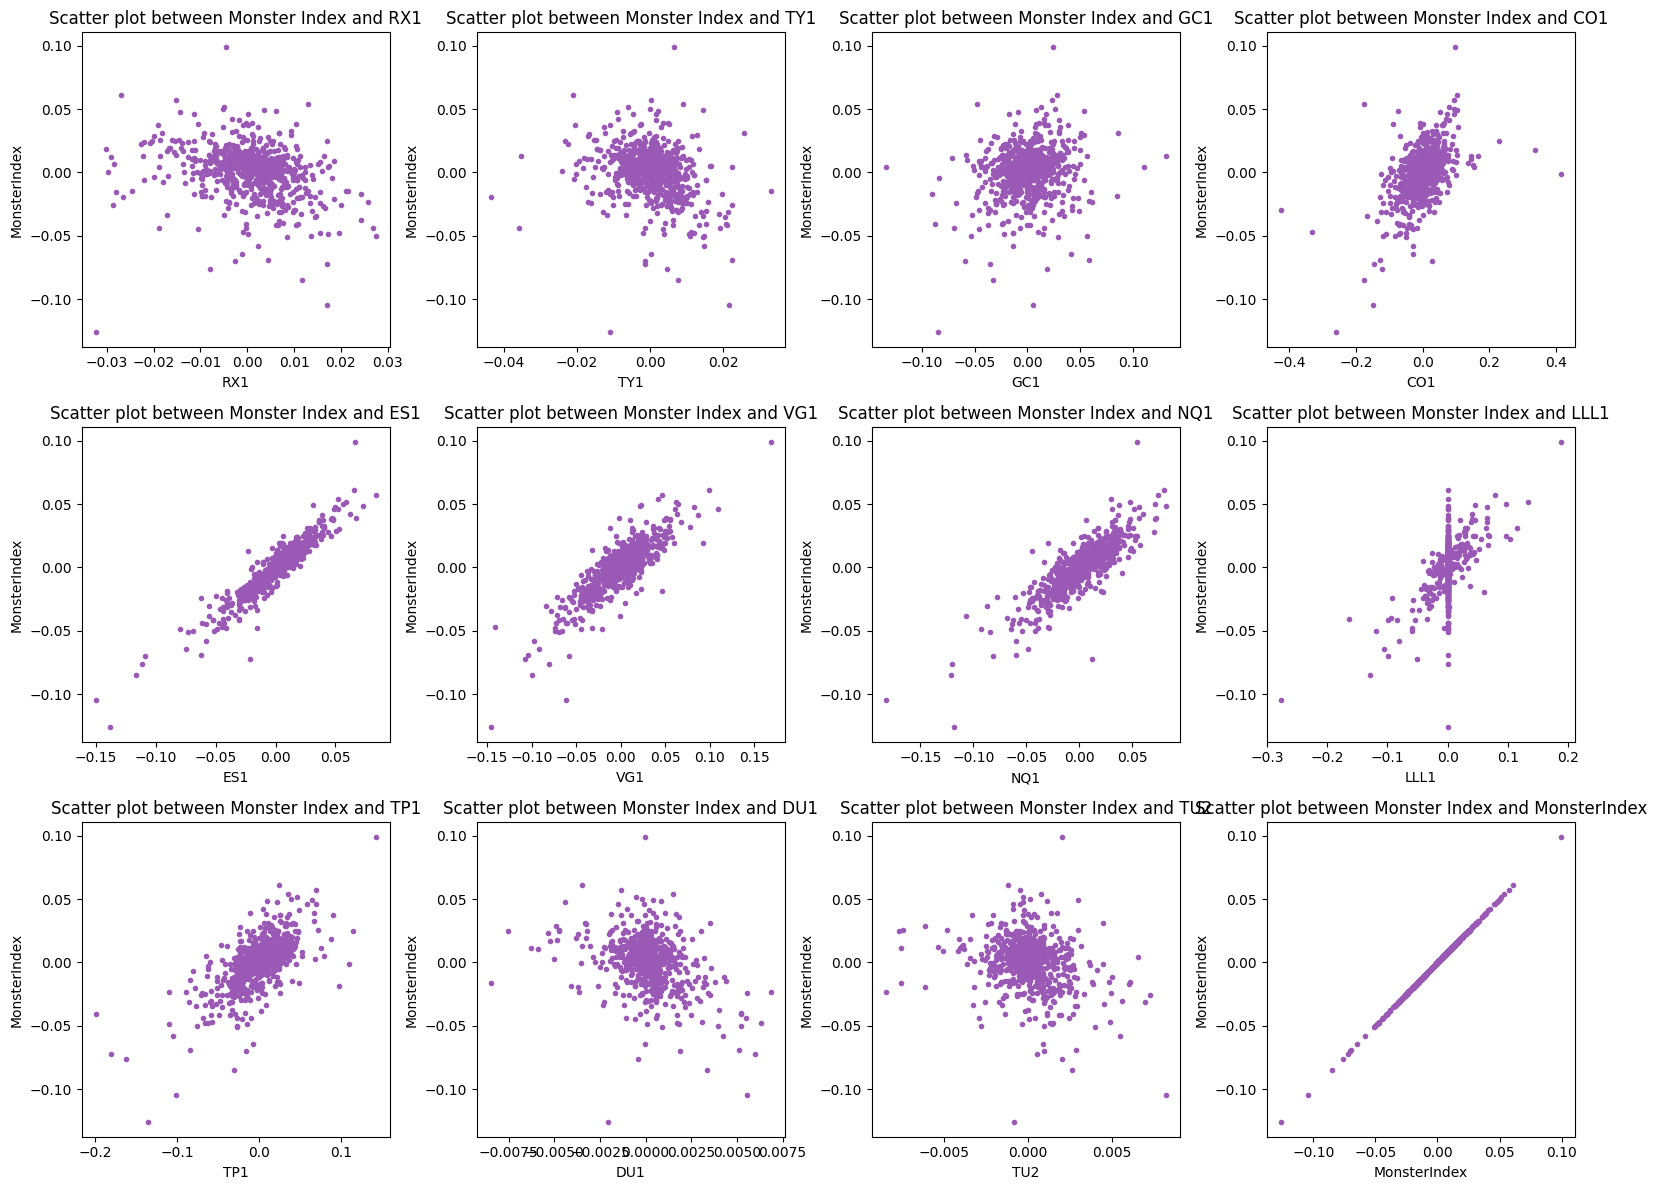

In [11]:
#Scatter plots between monster index and the futures
num_plots = len(df.columns)
num_rows = 3
num_columns = (num_plots + num_rows - 1) // num_rows

# Subplots' grid
fig, axs = plt.subplots(num_rows, num_columns, figsize=(16, 12))

# Plots
for i in range(num_rows):
    for j in range(num_columns):
        index = i * num_columns + j
        if index >= num_plots:
            break
        
        column = df.columns[index]
        axs[i, j].scatter(df[column], df['MonsterIndex'], s=9)
        axs[i, j].set_xlabel(column)
        axs[i, j].set_ylabel('MonsterIndex')
        axs[i, j].set_title(f'Scatter plot between Monster Index and {column}')
        color = ['#9b59b6'] 
        sns.set_palette(sns.color_palette(color))

plt.tight_layout()
plt.show()

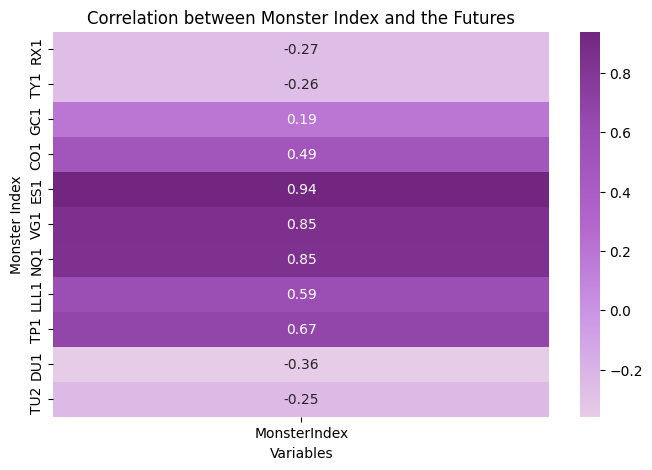

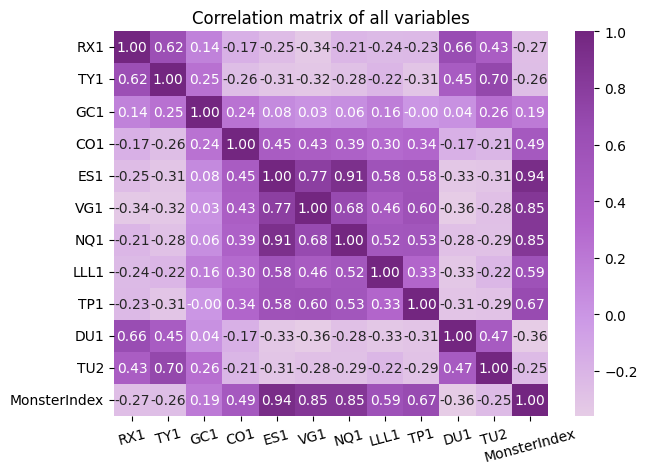

In [12]:
#Correlation between Monster Index and the Futures
plt.figure(figsize=(8, 5))
matrix = df.corr()
monster_correlation = matrix[['MonsterIndex']].drop('MonsterIndex')

#we set the colors we like
colors = [(0.9, 0.8, 0.90), (0.8, 0.6, 0.9), (0.7, 0.4, 0.8), (0.6, 0.3, 0.7), (0.45, 0.15, 0.5)]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

#monster_correlation = matrix[['MonsterIndex']]
sns.heatmap(monster_correlation, annot=True, cmap=cmap, cbar=True)
plt.title('Correlation between Monster Index and the Futures')
plt.xlabel('Variables')
plt.ylabel('Monster Index')
plt.show()


#Correlation matrix of all variables 
plt.figure(figsize=(7, 5))

sns.heatmap(matrix, annot=True, cmap=cmap, fmt=".2f")
plt.xticks(rotation=15)
plt.title('Correlation matrix of all variables')
plt.show()

#----------------------------------------


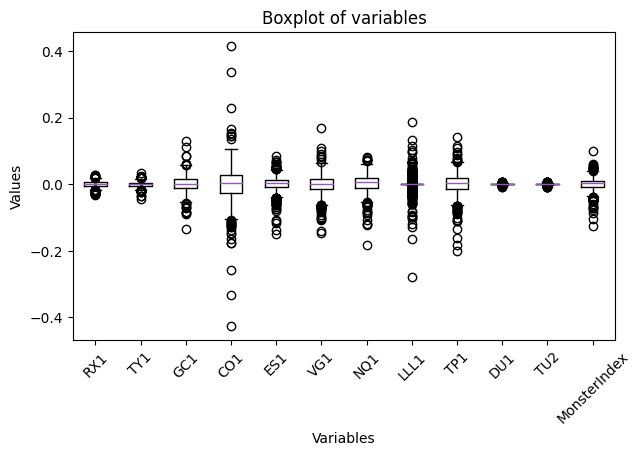

In [13]:
#Plot of the Boxplot
plt.figure(figsize= (7,4))
plt.boxplot(df, labels=df.columns)
plt.title('Boxplot of variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()